# CLASSIFICATION

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
print(fashion_mnist.load_data.__doc__)


Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    

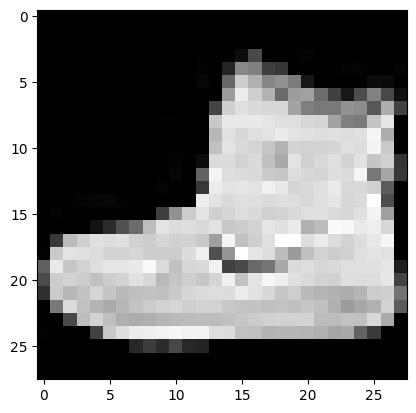

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [7]:
class_name = {
       0: "T-shirt/top",
       1: "Trouser",
       2: "Pullover",
       3: "Dress",
       4: "Coat",
       5: "Sandal",
       6: "Shirt",
       7: "Sneaker",
       8: "Bag",
       9: "Ankle boot",
}

In [8]:
print(class_name[y_train[0]])

Ankle boot


In [9]:
print("X max: ", X_train.max())
print("X min: ", X_train.min())

X max:  255
X min:  0


In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [12]:
y_test.shape

(10000, 10)

In [13]:
model = Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
loss = tf.losses.CategoricalCrossentropy()
opt = tf.optimizers.Adam()
metric = tf.metrics.CategoricalAccuracy()
model.compile(loss=loss, optimizer=opt, metrics=[metric])

In [16]:
model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=100)

Epoch 1/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.7486 - loss: 0.7552 - val_categorical_accuracy: 0.8512 - val_loss: 0.4182
Epoch 2/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8538 - loss: 0.4065 - val_categorical_accuracy: 0.8466 - val_loss: 0.4254
Epoch 3/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8679 - loss: 0.3625 - val_categorical_accuracy: 0.8698 - val_loss: 0.3522
Epoch 4/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8817 - loss: 0.3198 - val_categorical_accuracy: 0.8676 - val_loss: 0.3688
Epoch 5/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8886 - loss: 0.3046 - val_categorical_accuracy: 0.8689 - val_loss: 0.3648
Epoch 6/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8895 - loss: 0.2966 - val_categorical_accuracy: 0.8799 - val_loss: 0.3327
Epoch 7/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.9001 - los

In [17]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - categorical_accuracy: 0.8831 - loss: 0.4254


[0.4291011691093445, 0.8841999769210815]

In [18]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


In [19]:
y_pred.shape

(10000, 10)

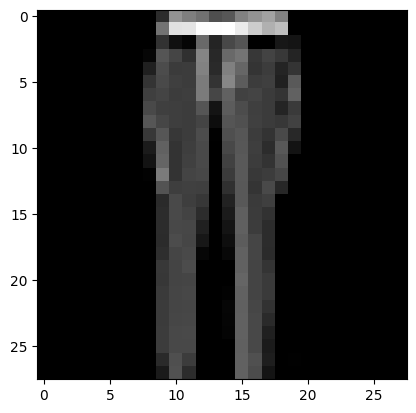

y predict:  Trouser
y test:  Trouser


In [25]:
index = 6000
plt.imshow(X_test[index], cmap="gray")
plt.show()
print("y predict: ", class_name[y_pred[index].argmax()])
print("y test: ", class_name[y_test[index].argmax()])